In [169]:
import pandas as pd
#Dataset Used: "titanic.csv"

'''
Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?
'''

dataset = pd.read_csv("Titanic-Dataset.csv")

sub_dataset=dataset[['Name','Pclass','Sex','Age','Fare','Survived']]

first_class=sub_dataset[sub_dataset['Pclass']==1]

print(f"The mean fare of first-class passengers is: {first_class['Fare'].mean():.2f}")
print(f"The median fare of first-class passengers is: {first_class['Fare'].median():.2f}")
print(f"The maximum fare of first-class passengers is: {first_class['Fare'].max():.2f}")
print(f"The minimum fare of first-class passengers is: {first_class['Fare'].min():.2f}")
##########################################################################################################################

The mean fare of first-class passengers is: 84.15
The median fare of first-class passengers is: 60.29
The maximum fare of first-class passengers is: 512.33
The minimum fare of first-class passengers is: 0.00


In [170]:
'''
Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.
'''
print("Null values in age column is: ",sub_dataset['Age'].isnull().sum())
sub_dataset=sub_dataset.dropna(subset='Age')
print("Null values in age column is: ",sub_dataset['Age'].isnull().sum())
#########################################################################################################################

Null values in age column is:  177
Null values in age column is:  0


In [171]:
'''
Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.
'''
one_hot_encoding=pd.get_dummies(dataset['Embarked'],prefix="Embarked",dtype=int)

dataset=pd.concat([dataset,one_hot_encoding],axis=1)

dataset=dataset.drop(columns=['Embarked'])

dataset.head(5)
###################################################################################################################

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


Text(0.5, 1.0, 'Survival rate in Titanic by sex')

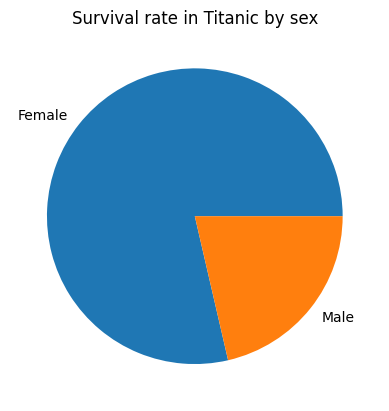

In [172]:
'''
Problem - 4:
Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.
'''

import matplotlib.pyplot as plt

male_dataset=sub_dataset[sub_dataset['Sex']=="male"]

female_dataset=sub_dataset[sub_dataset['Sex']=="female"]

survival_rate_male=male_dataset['Survived'].mean()

survival_rate_female=female_dataset['Survived'].mean()

surv=[survival_rate_female,survival_rate_male]

plt.pie(surv,labels=['Female','Male'])

plt.title("Survival rate in Titanic by sex")
######################################################################################################################

Text(0, 0.5, 'Mean survival rate')

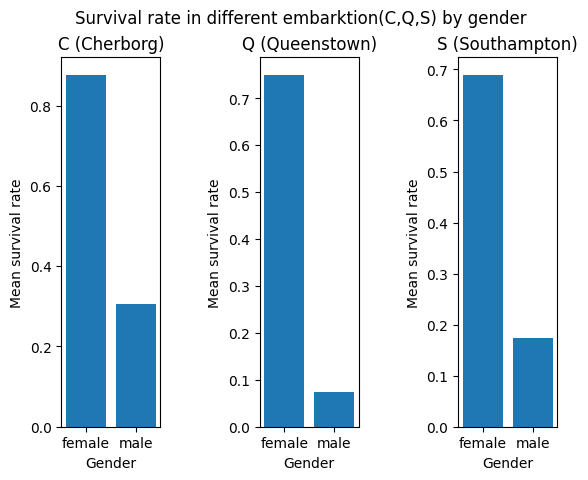

In [173]:
'''
Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).
'''
c_embarktion_dataset=dataset[dataset['Embarked_C']==1]

q_embarktion_dataset=dataset[dataset['Embarked_Q']==1]

s_embarktion_dataset=dataset[dataset['Embarked_S']==1]

c_mean_survival=c_embarktion_dataset.groupby('Sex')['Survived'].mean()

q_mean_survival=q_embarktion_dataset.groupby('Sex')['Survived'].mean()

s_mean_survival=s_embarktion_dataset.groupby('Sex')['Survived'].mean()

plt.suptitle("Survival rate in different embarktion(C,Q,S) by gender")

plt.subplots_adjust(wspace=1)
plt.subplot(1,3,1)
plt.bar(c_mean_survival.index,c_mean_survival.values)
plt.title("C (Cherborg)")
plt.xlabel("Gender")
plt.ylabel("Mean survival rate")

plt.subplot(1,3,2)
plt.bar(q_mean_survival.index,q_mean_survival.values)
plt.title("Q (Queenstown)")
plt.xlabel("Gender")
plt.ylabel("Mean survival rate")

plt.subplot(1,3,3)
plt.bar(s_mean_survival.index,s_mean_survival.values)
plt.title("S (Southampton)")
plt.xlabel("Gender")
plt.ylabel("Mean survival rate")
####################################################################################################################

/tmp/ipython-input-2314836427.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  firstc_mean_survival=first_class_subset.groupby('Age quantiles')['Survived'].mean()
/tmp/ipython-input-2314836427.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  secondc_mean_survival=second_class_subset.groupby('Age quantiles')['Survived'].mean()
/tmp/ipython-input-2314836427.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  third

Text(0, 0.5, 'Mean survival rate')

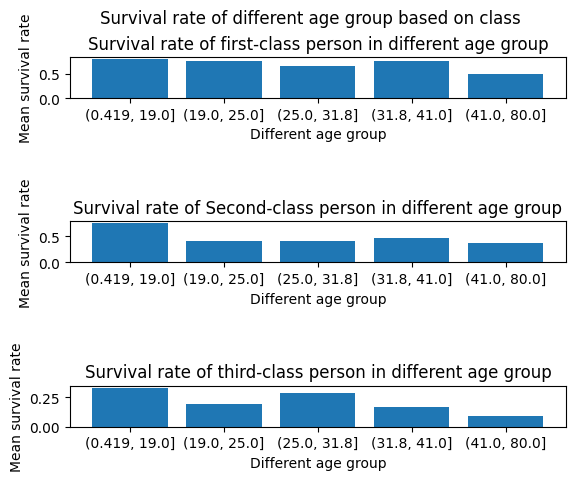

In [174]:
'''
Problem - 6{Optional}:
Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.
'''
sub_dataset['Age quantiles']=pd.qcut(sub_dataset['Age'],q=5)

first_class_subset=sub_dataset[sub_dataset['Pclass']==1]
second_class_subset=sub_dataset[sub_dataset['Pclass']==2]
third_class_subset=sub_dataset[sub_dataset['Pclass']==3]

firstc_mean_survival=first_class_subset.groupby('Age quantiles')['Survived'].mean()
secondc_mean_survival=second_class_subset.groupby('Age quantiles')['Survived'].mean()
thirdc_mean_survival=third_class_subset.groupby('Age quantiles')['Survived'].mean()

plt.suptitle("Survival rate of different age group based on class")
plt.subplots_adjust(hspace=3)

plt.subplot(3,1,1)
plt.title("Survival rate of first-class person in different age group")
plt.bar(firstc_mean_survival.index.astype(str),firstc_mean_survival.values)
plt.xlabel("Different age group")
plt.ylabel("Mean survival rate")

plt.subplot(3,1,2)
plt.title("Survival rate of Second-class person in different age group")
plt.bar(secondc_mean_survival.index.astype(str),secondc_mean_survival.values)
plt.xlabel("Different age group")
plt.ylabel("Mean survival rate")

plt.subplot(3,1,3)
plt.title("Survival rate of third-class person in different age group")
plt.bar(thirdc_mean_survival.index.astype(str),thirdc_mean_survival.values)
plt.xlabel("Different age group")
plt.ylabel("Mean survival rate")